# SPLEX TME 2 Clustering

The goal of the TME is to learn how to use some popular clustering methods (unsupervised learning), and how to interpret the results.

We will use the scikit-learn Python library http://scikit-learn.org which is already installed on the computers.

## Data (simulated data sets + data sets of TME 1)

We explore two data sets downloadable from the Machine Learning Repository (http://archive.ics.uci.edu/ml/index.php)

- `BreastCancerWisconsin(Diagnostic)DataSet` (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))
- `MiceProteinExpressionDataSet` (https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression)

## Libraries

You will need to load the following packages:

In [1]:
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

## Analysis

Before running analysis on the Breast and Mice data sets, we will do analysis on three simulated data sets to better understand what different clustering methods do, and why they produce different clustering. Generate and visualize the artificial data as follows:

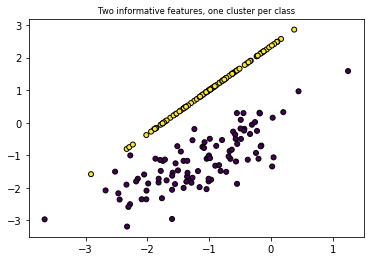

In [2]:
# First simulated data set
plt.title("Two informative features, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=25, edgecolor='k')

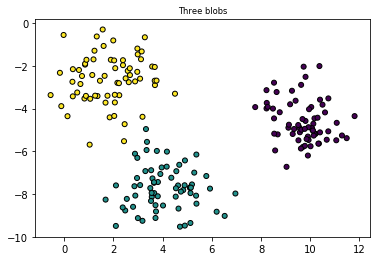

In [3]:
# Second simulated data set
plt.title("Three blobs", fontsize='small')
X2, Y2 = make_blobs(n_samples=200, n_features=2, centers=3)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, s=25, edgecolor='k')

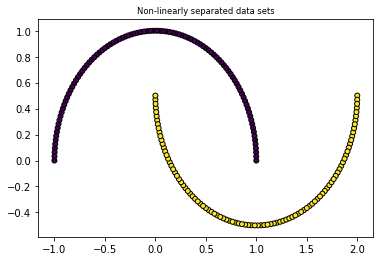

In [4]:
# Third simulated data set
plt.title("Non-linearly separated data sets", fontsize='small')
X3, Y3 = make_moons(n_samples=200, shuffle=True, noise=None, random_state=None)
plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3, s=25, edgecolor='k')

Apply the following clustering methods to the three simulated data sets.

## Clustering Methods

### First simulated data set

In [5]:
X = X1
Y = Y1
k = 2

#### 1. K-means

http://scikit-learn.org/stable/modules/clustering.html#k-means

An example of k-means clustering (where `k` is the number of clusters you want to produce, and `X` is the data matrix):

In [6]:
km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=2, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

You can also visualize the clustering (and compare it to the true repartition):

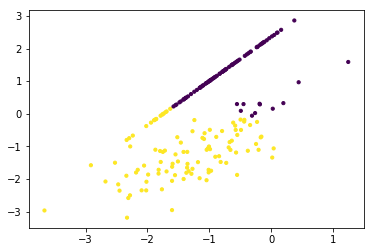

In [7]:
plt.scatter(X[:, 0], X[:, 1], s=10, c=km.labels_)

#### 2. Hierarchical clustering

http://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

An example of hierarchical clustering (where `k` is the number of clusters you want to produce, and `X` is the data matrix):

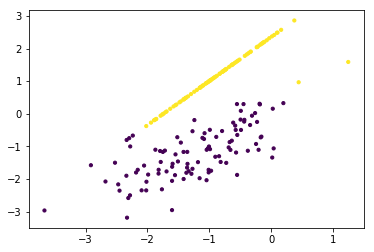

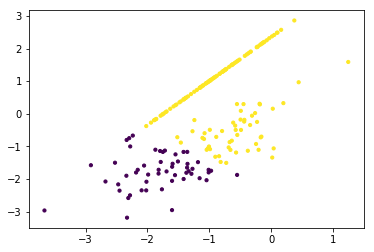

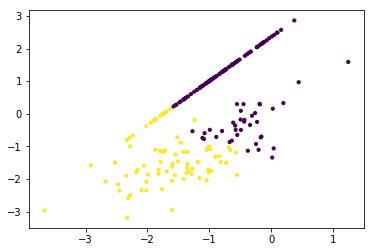

In [8]:
for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=k)
    clustering.fit(X)
    
    plt.scatter(X[:, 0], X[:, 1], s=10, c=clustering.labels_)
    plt.show()

#### 3. Spectral clustering

http://scikit-learn.org/stable/modules/clustering.html#spectral-clustering

An example of spectral clustering (where `k` is the number of clusters you want to produce, and `X` is the data matrix):

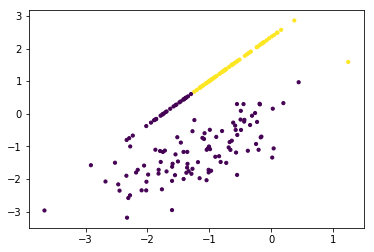

In [9]:
spectral = cluster.SpectralClustering(n_clusters=k, eigen_solver='arpack', affinity="nearest_neighbors")
spectral.fit(X)

plt.scatter(X[:, 0], X[:, 1], s=10, c=spectral.labels_)
plt.show()

#### Analysis of the results of the three clustering methods in terms of

- Homogeneity `metrics.homogeneity_score()`
- Completeness `metrics.completeness_score()`
- V-measure metrics.v `measure_score()`
- Adjusted Rand-Index `metrics.adjusted_rand_score()`
- Silhouette Coefficient `metrics.silhouette score()`

In [10]:
c1 = km.labels_
c2 = clustering.labels_
c3 = spectral.labels_

liste = [c1, c2, c3]
print(liste)

[array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1], dtype=int32), array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 

In [11]:
homogen_score = []
for c in liste:
    homogen_score.append(metrics.homogeneity_score(Y, c))
print(homogen_score)

[0.41859122011336686, 0.16676215873902625, 0.4574123650392626]


In [12]:
complet_score = []
for c in liste:
    complet_score.append(metrics.completeness_score(Y, c))
print(complet_score)

[0.41968172590787634, 0.1717514358520863, 0.48741033503487485]


In [13]:
measure_score = []
for c in liste:
    measure_score.append(metrics.v_measure_score(Y, c))
print(measure_score)

[0.4191357636933917, 0.1692200293687896, 0.47193513465624276]


In [14]:
adj_rand_score = []
for c in liste:
    adj_rand_score.append(metrics.adjusted_rand_score(Y, c))
print(adj_rand_score)

[0.5159764771953641, 0.20777822662088472, 0.47367759451667246]


### Second simulated data set

In [15]:
X = X2
Y = Y2
k = 3

#### 1. K-means

http://scikit-learn.org/stable/modules/clustering.html#k-means

An example of k-means clustering (where `k` is the number of clusters you want to produce, and `X` is the data matrix):

In [16]:
km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

You can also visualize the clustering (and compare it to the true repartition):

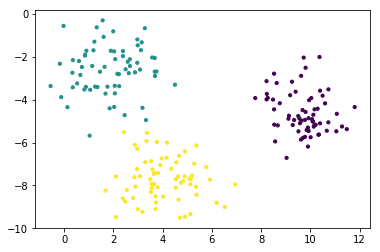

In [17]:
plt.scatter(X[:, 0], X[:, 1], s=10, c=km.labels_)

#### 2. Hierarchical clustering

http://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

An example of hierarchical clustering (where `k` is the number of clusters you want to produce, and `X` is the data matrix):

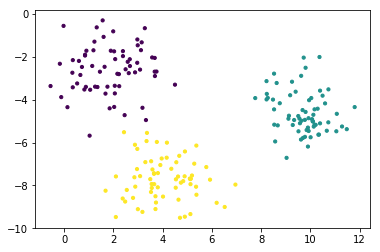

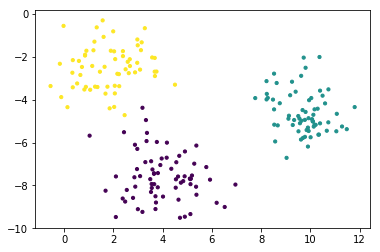

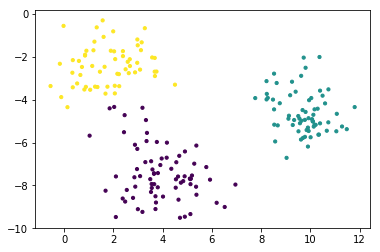

In [18]:
for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=k)
    clustering.fit(X)
    
    plt.scatter(X[:, 0], X[:, 1], s=10, c=clustering.labels_)
    plt.show()

#### 3. Spectral clustering

http://scikit-learn.org/stable/modules/clustering.html#spectral-clustering

An example of spectral clustering (where `k` is the number of clusters you want to produce, and `X` is the data matrix):

/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


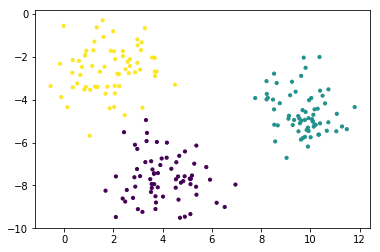

In [19]:
spectral = cluster.SpectralClustering(n_clusters=k, eigen_solver='arpack', affinity="nearest_neighbors")
spectral.fit(X)

plt.scatter(X[:, 0], X[:, 1], s=10, c=spectral.labels_)
plt.show()

#### Analysis of the results of the three clustering methods in terms of

- Homogeneity `metrics.homogeneity_score()`
- Completeness `metrics.completeness_score()`
- V-measure metrics.v `measure_score()`
- Adjusted Rand-Index `metrics.adjusted_rand_score()`
- Silhouette Coefficient `metrics.silhouette score()`

In [20]:
c1 = km.labels_
c2 = clustering.labels_
c3 = spectral.labels_

liste = [c1, c2, c3]
print(liste)

[array([1, 2, 1, 2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 0, 0, 1, 1, 1, 2, 0, 2, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 1, 1, 2, 2, 0, 1,
       0, 1, 1, 1, 1, 0, 2, 2, 0, 1, 0, 1, 2, 0, 1, 1, 0, 2, 0, 1, 2, 2,
       1, 2, 1, 1, 2, 0, 2, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 2, 0, 1, 1, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 1, 0,
       0, 2, 2, 2, 2, 0, 1, 2, 1, 0, 1, 2, 2, 1, 2, 2, 2, 2, 0, 1, 2, 0,
       1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 2, 2, 0, 0, 1,
       1, 0, 2, 0, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       2, 0, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 0, 2,
       2, 0], dtype=int32), array([2, 0, 2, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1,
       0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 2, 1, 0, 0, 1, 2, 1, 2, 0, 1, 2, 2, 1, 0, 1, 2, 0, 0,
       2, 0, 2, 2, 0, 1, 0, 2, 0, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 0, 2, 1,
       2, 0, 1, 2, 2, 

In [21]:
homogen_score = []
for c in liste:
    homogen_score.append(metrics.homogeneity_score(Y, c))
print(homogen_score)

[0.9527609983309226, 0.9056125175683416, 0.9762780859303756]


In [22]:
complet_score = []
for c in liste:
    complet_score.append(metrics.completeness_score(Y, c))
print(complet_score)

[0.9527609983309225, 0.9082274197516682, 0.9764117509372342]


In [23]:
measure_score = []
for c in liste:
    measure_score.append(metrics.v_measure_score(Y, c))
print(measure_score)

[0.9527609983309225, 0.906918083787672, 0.976344913859004]


In [24]:
adj_rand_score = []
for c in liste:
    adj_rand_score.append(metrics.adjusted_rand_score(Y, c))
print(adj_rand_score)

[0.9702265283904825, 0.9135472188752969, 0.9850007840499246]


### Third simulated data set

In [25]:
X = X3
Y = Y3
k = 2

#### 1. K-means

http://scikit-learn.org/stable/modules/clustering.html#k-means

An example of k-means clustering (where `k` is the number of clusters you want to produce, and `X` is the data matrix):

In [26]:
km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=2, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

You can also visualize the clustering (and compare it to the true repartition):

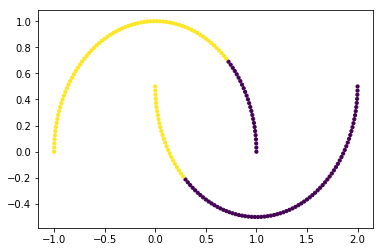

In [27]:
plt.scatter(X[:, 0], X[:, 1], s=10, c=km.labels_)

#### 2. Hierarchical clustering

http://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

An example of hierarchical clustering (where `k` is the number of clusters you want to produce, and `X` is the data matrix):

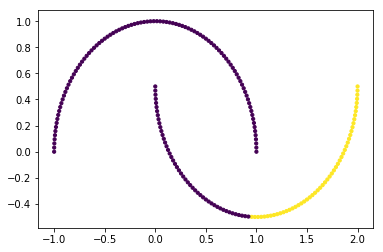

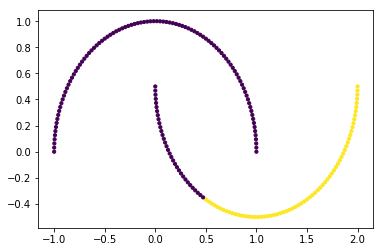

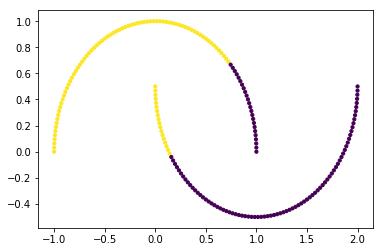

In [28]:
for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=k)
    clustering.fit(X)
    
    plt.scatter(X[:, 0], X[:, 1], s=10, c=clustering.labels_)
    plt.show()

#### 3. Spectral clustering

http://scikit-learn.org/stable/modules/clustering.html#spectral-clustering

An example of spectral clustering (where `k` is the number of clusters you want to produce, and `X` is the data matrix):

/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


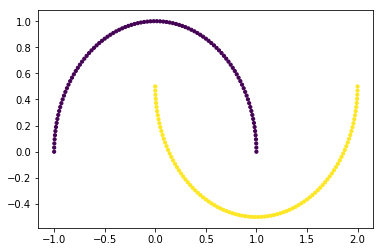

In [29]:
spectral = cluster.SpectralClustering(n_clusters=k, eigen_solver='arpack', affinity="nearest_neighbors")
spectral.fit(X)

plt.scatter(X[:, 0], X[:, 1], s=10, c=spectral.labels_)
plt.show()

#### Analysis of the results of the three clustering methods in terms of

- Homogeneity `metrics.homogeneity_score()`
- Completeness `metrics.completeness_score()`
- V-measure metrics.v `measure_score()`
- Adjusted Rand-Index `metrics.adjusted_rand_score()`
- Silhouette Coefficient `metrics.silhouette score()`

In [30]:
c1 = km.labels_
c2 = clustering.labels_
c3 = spectral.labels_

liste = [c1, c2, c3]
print(liste)

[array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0], dtype=int32), array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 

In [31]:
homogen_score = []
for c in liste:
    homogen_score.append(metrics.homogeneity_score(Y, c))
print(homogen_score)

[0.18872187554086517, 0.25984292601133924, 1.0]


In [32]:
complet_score = []
for c in liste:
    complet_score.append(metrics.completeness_score(Y, c))
print(complet_score)

[0.18872187554086517, 0.2605198638037777, 1.0]


In [33]:
measure_score = []
for c in liste:
    measure_score.append(metrics.v_measure_score(Y, c))
print(measure_score)

[0.18872187554086517, 0.2601809545947769, 1.0]


In [34]:
adj_rand_score = []
for c in liste:
    adj_rand_score.append(metrics.adjusted_rand_score(Y, c))
print(adj_rand_score)

[0.24621212121212127, 0.3330606110191936, 1.0]


### 5. What is an optimal clustering method for each simulated data set?

When looking at the graphs and the scores we can observe that the hierarchical, kmean and spectral clustering well work on the first and second simulated datasets. So the isotropic Gaussian blobs seem to be a really well appropriated datasets for those three kind of clustering calculation.
Regarding the first simulated dataset, the hierarchical, kmean and spectral clustering have their performance reduced by two comparing to the second dataset. So the points normally distributed seem to be less appropriated datasets for those three kind of clustering calculation.
Finally, the third dataset is not appropriate with kmean method, a bit better for hierarchical method  and totally appropriated with spectral one. 

### 6. Re-run the clustering methods on the Breast cancer and Mice data sets. Do not include the class variables in your clustering analysis but compare the obtained clustering with the true class labels.

### BreastCancer

In [35]:
import numpy as np
import pandas as pd

In [36]:
# Read .data file
BreastCancer = pd.read_table('breast-cancer-wisconsin-fixed.data')

# Remove serie label
BreastCancer = BreastCancer['Wisconsin Breast Cancer Database (January 8, 1991)'].map(lambda x: x.split(','))

print(BreastCancer)

0      [Sample code number, Clump Thickness, Uniformi...
1                [1000025, 5, 1, 1, 1, 2, 1, 3, 1, 1, 2]
2               [1002945, 5, 4, 4, 5, 7, 10, 3, 2, 1, 2]
3                [1015425, 3, 1, 1, 1, 2, 2, 3, 1, 1, 2]
4                [1016277, 6, 8, 8, 1, 3, 4, 3, 7, 1, 2]
5                [1017023, 4, 1, 1, 3, 2, 1, 3, 1, 1, 2]
6             [1017122, 8, 10, 10, 8, 7, 10, 9, 7, 1, 4]
7               [1018099, 1, 1, 1, 1, 2, 10, 3, 1, 1, 2]
8                [1018561, 2, 1, 2, 1, 2, 1, 3, 1, 1, 2]
9                [1033078, 2, 1, 1, 1, 2, 1, 1, 1, 5, 2]
10               [1033078, 4, 2, 1, 1, 2, 1, 2, 1, 1, 2]
11               [1035283, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2]
12               [1036172, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2]
13               [1041801, 5, 3, 3, 3, 2, 3, 4, 4, 1, 4]
14               [1043999, 1, 1, 1, 1, 2, 3, 3, 1, 1, 2]
15              [1044572, 8, 7, 5, 10, 7, 9, 5, 5, 4, 4]
16               [1047630, 7, 4, 6, 4, 6, 1, 4, 3, 1, 4]
17               [1048672, 4, 1

In [37]:
BreastCancerColumns = BreastCancer[0]
print(BreastCancerColumns)

['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']


In [38]:
# Remove columns names line
BreastCancer = BreastCancer[1:]

# Remove id of each data entry
BreastCancer = BreastCancer.map(lambda x: x[1:])

print(BreastCancer)

1             [5, 1, 1, 1, 2, 1, 3, 1, 1, 2]
2            [5, 4, 4, 5, 7, 10, 3, 2, 1, 2]
3             [3, 1, 1, 1, 2, 2, 3, 1, 1, 2]
4             [6, 8, 8, 1, 3, 4, 3, 7, 1, 2]
5             [4, 1, 1, 3, 2, 1, 3, 1, 1, 2]
6          [8, 10, 10, 8, 7, 10, 9, 7, 1, 4]
7            [1, 1, 1, 1, 2, 10, 3, 1, 1, 2]
8             [2, 1, 2, 1, 2, 1, 3, 1, 1, 2]
9             [2, 1, 1, 1, 2, 1, 1, 1, 5, 2]
10            [4, 2, 1, 1, 2, 1, 2, 1, 1, 2]
11            [1, 1, 1, 1, 1, 1, 3, 1, 1, 2]
12            [2, 1, 1, 1, 2, 1, 2, 1, 1, 2]
13            [5, 3, 3, 3, 2, 3, 4, 4, 1, 4]
14            [1, 1, 1, 1, 2, 3, 3, 1, 1, 2]
15           [8, 7, 5, 10, 7, 9, 5, 5, 4, 4]
16            [7, 4, 6, 4, 6, 1, 4, 3, 1, 4]
17            [4, 1, 1, 1, 2, 1, 2, 1, 1, 2]
18            [4, 1, 1, 1, 2, 1, 3, 1, 1, 2]
19          [10, 7, 7, 6, 4, 10, 4, 1, 2, 4]
20            [6, 1, 1, 1, 2, 1, 3, 1, 1, 2]
21          [7, 3, 2, 10, 5, 10, 5, 4, 4, 4]
22          [10, 5, 5, 3, 6, 7, 7, 10, 1, 4]
23        

In [39]:
# We make a for loop which will allow to impute the missing values with:
#  - the average of the values of the columns containing the numerical values
#  - a "missing" for olumns containing missing text

BreastCancerMatrix = []
k = 0
for lines in BreastCancer:
    BreastCancerMatrix.append([])
    median = np.median(np.array(list(filter(lambda i: i != '?', lines))).astype(np.float))
    for x in lines:
        BreastCancerMatrix[k].append(median if x == "?" else float(x))
    k += 1

BreastCancerMatrix = np.array(BreastCancerMatrix)

print(BreastCancerMatrix)

[[ 5.  1.  1. ...  1.  1.  2.]
 [ 5.  4.  4. ...  2.  1.  2.]
 [ 3.  1.  1. ...  1.  1.  2.]
 ...
 [ 5. 10. 10. ... 10.  2.  4.]
 [ 4.  8.  6. ...  6.  1.  4.]
 [ 4.  8.  8. ...  4.  1.  4.]]


In [40]:
X = BreastCancerMatrix[:,:-1]

print(X)

[[ 5.  1.  1. ...  3.  1.  1.]
 [ 5.  4.  4. ...  3.  2.  1.]
 [ 3.  1.  1. ...  3.  1.  1.]
 ...
 [ 5. 10. 10. ...  8. 10.  2.]
 [ 4.  8.  6. ... 10.  6.  1.]
 [ 4.  8.  8. ... 10.  4.  1.]]


In [41]:
Y = BreastCancerMatrix[:,-1]

print(Y)

[2. 2. 2. 2. 2. 4. 2. 2. 2. 2. 2. 2. 4. 2. 4. 4. 2. 2. 4. 2. 4. 4. 2. 4.
 2. 4. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2. 4. 2. 4. 4. 2. 4. 4. 4. 4. 2. 4. 2.
 2. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2. 4. 4. 2. 4. 2. 4. 4. 2. 2. 4.
 2. 4. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 4. 4. 4. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 4. 4. 4. 4. 2. 4. 4. 4. 4. 4. 2. 4. 2. 4. 4. 4. 2. 2. 2. 4. 2. 2.
 2. 2. 4. 4. 4. 2. 4. 2. 4. 2. 2. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 2.
 2. 2. 4. 2. 2. 4. 2. 4. 4. 2. 2. 4. 2. 2. 2. 4. 4. 2. 2. 2. 2. 2. 4. 4.
 2. 2. 2. 2. 2. 4. 4. 4. 2. 4. 2. 4. 2. 2. 2. 4. 4. 2. 4. 4. 4. 2. 4. 4.
 2. 2. 2. 2. 2. 2. 2. 2. 4. 4. 2. 2. 2. 4. 4. 2. 2. 2. 4. 4. 2. 4. 4. 4.
 2. 2. 4. 2. 2. 4. 4. 4. 4. 2. 4. 4. 2. 4. 4. 4. 2. 4. 2. 2. 4. 4. 4. 4.
 2. 2. 2. 2. 2. 2. 4. 4. 2. 2. 2. 4. 2. 4. 4. 4. 2. 2. 2. 2. 4. 4. 4. 4.
 4. 2. 4. 4. 4. 2. 4. 2. 4. 4. 2. 2. 2. 2. 2. 4. 2. 2. 4. 4. 4. 4. 4. 2.
 4. 4. 2. 2. 4. 4. 2. 4. 2. 2. 2. 4. 4. 2. 4. 2. 4. 4. 2. 2. 4. 2. 2. 2.
 4. 2. 2. 2. 4. 4. 2. 2. 4. 2. 2. 4. 2. 2. 4. 2. 4.

In [42]:
k = 2

#### 1. K-means

http://scikit-learn.org/stable/modules/clustering.html#k-means

An example of k-means clustering (where `k` is the number of clusters you want to produce, and `X` is the data matrix):

In [43]:
km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=2, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

You can also visualize the clustering (and compare it to the true repartition):

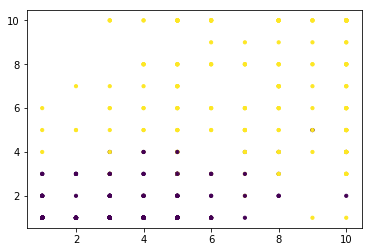

In [44]:
plt.scatter(X[:, 0], X[:, 1], s=10, c=km.labels_)

#### 2. Hierarchical clustering

http://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

An example of hierarchical clustering (where `k` is the number of clusters you want to produce, and `X` is the data matrix):

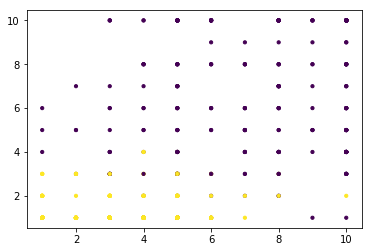

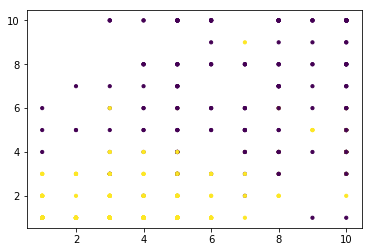

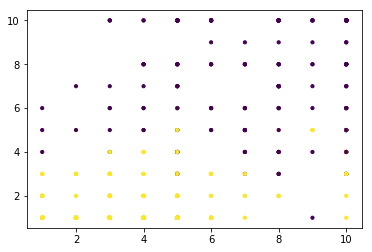

In [45]:
for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=k)
    clustering.fit(X)
    
    plt.scatter(X[:, 0], X[:, 1], s=10, c=clustering.labels_)
    plt.show()

#### 3. Spectral clustering

http://scikit-learn.org/stable/modules/clustering.html#spectral-clustering

An example of spectral clustering (where `k` is the number of clusters you want to produce, and `X` is the data matrix):

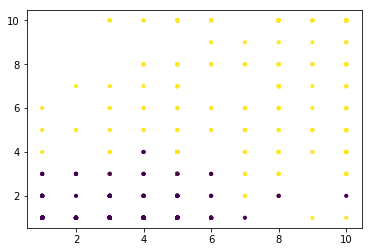

In [46]:
spectral = cluster.SpectralClustering(n_clusters=k, eigen_solver='arpack', affinity="nearest_neighbors")
spectral.fit(X)

plt.scatter(X[:, 0], X[:, 1], s=10, c=spectral.labels_)
plt.show()

#### 4. Analyse the results of clustering in terms of

- Homogeneity `metrics.homogeneity_score()`
- Completeness `metrics.completeness_score()`
- V-measure metrics.v `measure_score()`
- Adjusted Rand-Index `metrics.adjusted_rand_score()`
- Silhouette Coefficient `metrics.silhouette score()`

In [47]:
c = spectral.labels_

In [48]:
metrics.homogeneity_score(Y, c)

0.8006837404629288

In [49]:
metrics.completeness_score(Y, c)

0.7879916356928952

In [50]:
metrics.v_measure_score(Y, c)

0.7942869887576129

In [51]:
metrics.adjusted_rand_score(Y, c)

0.8770175403958295

In [52]:
#metrics.silhouette_score(Y, c)

### Mice

In [53]:
Mice = pd.read_excel('Data_Cortex_Nuclear.xls')
print(Mice)

       MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0        309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1        309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2        309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3        309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4        309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
5        309_6  0.447506  0.628176  0.367388  2.385939  4.807635  0.218578   
6        309_7  0.428033  0.573696  0.342709  2.334224  4.473130  0.225173   
7        309_8  0.416923  0.564036  0.327703  2.260135  4.268735  0.214834   
8        309_9  0.386311  0.538428  0.317720  2.125725  4.063950  0.207222   
9       309_10  0.380827  0.499294  0.362462  2.096266  3.598587  0.227649   
10      309_11  0.366511  0.513278  0.327792  2.072572  3.661058  0.229475   
11      309_12  0.364154  0.499411  0.355124  2.006871  3.466627

In [54]:
# We define 3 variables as vectors MiceColumns, MiceNumericColumns and MiceNonNumericColumns such that:
#  - MiceColumns stores all the column names of my file,
#  - MiceNumericColumns stores all the column names associated with digital measurements and
#  - MiceNonNumericColumns references all column names whose values are not numeric.

# MiceColumns: extract the 1st line of the file which corresponds to the names of the columns
MiceColumns = Mice.columns

# MiceNumericColumns: there are 77 names of columns that correspond to numeric values
MiceNumericColumns = MiceColumns[1:78]

# MiceNonNumericColumns: we concatenate the rest of the columns that contain only text
MiceNonNumericColumns = MiceColumns[0:1].append(MiceColumns[78:82])

print(MiceColumns)

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')


In [55]:
# Before you can use these data and analyze them statistically, you need to be able to clean
# them by assigning the correct types to the data using astype().

# Indeed, the use of df.types allows us to know all the types of data in all our file and
# we observe after application of this function that all the columns have an object format

for x in MiceNumericColumns:
    Mice[x] = pd.to_numeric(Mice[x], errors='coerce')
    Mice[x] = Mice[x].astype('float')
    
print(Mice)

       MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0        309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1        309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2        309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3        309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4        309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
5        309_6  0.447506  0.628176  0.367388  2.385939  4.807635  0.218578   
6        309_7  0.428033  0.573696  0.342709  2.334224  4.473130  0.225173   
7        309_8  0.416923  0.564036  0.327703  2.260135  4.268735  0.214834   
8        309_9  0.386311  0.538428  0.317720  2.125725  4.063950  0.207222   
9       309_10  0.380827  0.499294  0.362462  2.096266  3.598587  0.227649   
10      309_11  0.366511  0.513278  0.327792  2.072572  3.661058  0.229475   
11      309_12  0.364154  0.499411  0.355124  2.006871  3.466627

In [56]:
for x in MiceNumericColumns:
    Mice.fillna(Mice[x].median(), inplace=True)

print(Mice)

       MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0        309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1        309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2        309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3        309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4        309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
5        309_6  0.447506  0.628176  0.367388  2.385939  4.807635  0.218578   
6        309_7  0.428033  0.573696  0.342709  2.334224  4.473130  0.225173   
7        309_8  0.416923  0.564036  0.327703  2.260135  4.268735  0.214834   
8        309_9  0.386311  0.538428  0.317720  2.125725  4.063950  0.207222   
9       309_10  0.380827  0.499294  0.362462  2.096266  3.598587  0.227649   
10      309_11  0.366511  0.513278  0.327792  2.072572  3.661058  0.229475   
11      309_12  0.364154  0.499411  0.355124  2.006871  3.466627

In [57]:
X = Mice[MiceNumericColumns]
Y = Mice["class"]
k = 2

#### 1. K-means

http://scikit-learn.org/stable/modules/clustering.html#k-means

An example of k-means clustering (where `k` is the number of clusters you want to produce, and `X` is the data matrix):

In [58]:
km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=2, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

You can also visualize the clustering (and compare it to the true repartition):

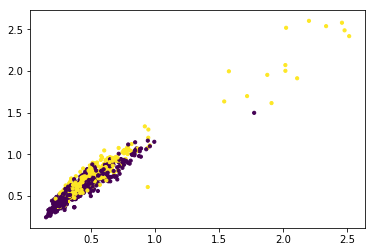

In [59]:
plt.scatter(X[MiceNumericColumns[0]], X[MiceNumericColumns[1]], s=10, c=km.labels_)

#### 2. Hierarchical clustering

http://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

An example of hierarchical clustering (where `k` is the number of clusters you want to produce, and `X` is the data matrix):

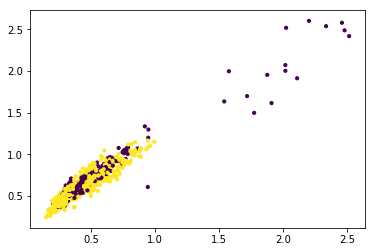

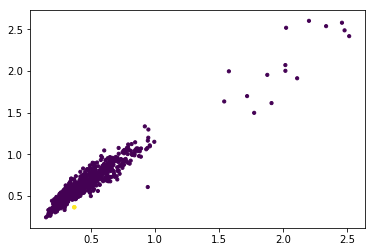

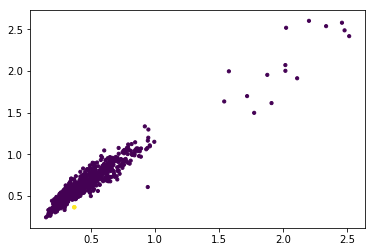

In [60]:
for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=k)
    clustering.fit(X)
    
    plt.scatter(X[MiceNumericColumns[0]], X[MiceNumericColumns[1]], s=10, c=clustering.labels_)
    plt.show()

#### 3. Spectral clustering

http://scikit-learn.org/stable/modules/clustering.html#spectral-clustering

An example of spectral clustering (where `k` is the number of clusters you want to produce, and `X` is the data matrix):

/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


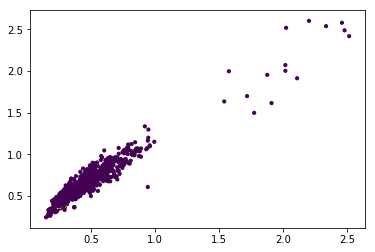

In [61]:
spectral = cluster.SpectralClustering(n_clusters=k, eigen_solver='arpack', affinity="nearest_neighbors")
spectral.fit(X)

plt.scatter(X[MiceNumericColumns[0]], X[MiceNumericColumns[1]], s=10, c=spectral.labels_)
plt.show()

#### 4. Analyse the results of clustering in terms of

- Homogeneity `metrics.homogeneity_score()`
- Completeness `metrics.completeness_score()`
- V-measure metrics.v `measure_score()`
- Adjusted Rand-Index `metrics.adjusted_rand_score()`
- Silhouette Coefficient `metrics.silhouette score()`

In [62]:
c = spectral.labels_

In [63]:
metrics.homogeneity_score(Y, c)

0.014261063318617538

In [64]:
metrics.completeness_score(Y, c)

0.40423643893949207

In [65]:
metrics.v_measure_score(Y, c)

0.027550183311981082

In [66]:
metrics.adjusted_rand_score(Y, c)

0.0008135237267976421

In [67]:
#metrics.silhouette_score(Y, c)

To conclude this analysis of breast cancer data and mice data we can observe that there is a bad representation of the clusters for our data because we are doing classification of points in a space of high dimension (more than 2D): there are as many predicted features as truth ones.